In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import scipy.stats as stats

print(pd.__version__)

%matplotlib inline

0.22.0


In [2]:
# Read table

train_df = pd.read_table("./train.tsv", index_col = 'train_id', dtype = {'item_condition_id':CategoricalDtype(categories = [str(i) for i in range(1,6)], ordered = True), 'category_name':'category', 'brand_name': 'category', 'shipping':'category'})

/Users/Abe/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# Create columns for the first three hierarchical levels represented in the category name column.
# Levels greater than one contain the names of the parent levels with the current level, separeated by slashes

a, b, c, d = train_df['category_name'].str.split("/", 3).str
category_oneLevel = a
category_twoLevel = a + "/" + b
category_threeLevel = a + "/" + b + "/" + c
train_df['category_oneLevel'] = category_oneLevel
train_df['category_twoLevel'] = category_twoLevel
train_df['category_threeLevel'] = category_threeLevel
for col in ['category_oneLevel', 'category_twoLevel', 'category_threeLevel']:
    train_df[col] = train_df[col].astype('category')


In [4]:
# The categories of the first category level

for i in train_df.category_oneLevel.cat.categories.values:
    print(i)

Beauty
Electronics
Handmade
Home
Kids
Men
Other
Sports & Outdoors
Vintage & Collectibles
Women


In [5]:
# The path of each category in the second level

for i in train_df.category_twoLevel.cat.categories.values:
    print(i)

Beauty/Bath & Body
Beauty/Fragrance
Beauty/Hair Care
Beauty/Makeup
Beauty/Other
Beauty/Skin Care
Beauty/Tools & Accessories
Electronics/Cameras & Photography
Electronics/Car Audio, Video & GPS
Electronics/Cell Phones & Accessories
Electronics/Computers & Tablets
Electronics/Media
Electronics/Other
Electronics/TV, Audio & Surveillance
Electronics/Video Games & Consoles
Handmade/Accessories
Handmade/Art
Handmade/Bags and Purses
Handmade/Books and Zines
Handmade/Candles
Handmade/Ceramics and Pottery
Handmade/Children
Handmade/Clothing
Handmade/Crochet
Handmade/Dolls and Miniatures
Handmade/Furniture
Handmade/Geekery
Handmade/Glass
Handmade/Holidays
Handmade/Housewares
Handmade/Jewelry
Handmade/Knitting
Handmade/Music
Handmade/Needlecraft
Handmade/Other
Handmade/Others
Handmade/Paper Goods
Handmade/Patterns
Handmade/Pets
Handmade/Quilts
Handmade/Toys
Handmade/Weddings
Handmade/Woodworking
Home/Artwork
Home/Bath
Home/Bedding
Home/Cleaning Supplies
Home/Furniture
Home/Home Appliances
Home/Ho

In [6]:
# The first few rows of the training data
train_df.head()

name item_condition_id  \
train_id                                                          
0         MLB Cincinnati Reds T Shirt Size XL                 3   
1            Razer BlackWidow Chroma Keyboard                 3   
2                              AVA-VIV Blouse                 1   
3                       Leather Horse Statues                 1   
4                        24K GOLD plated rose                 1   

                                              category_name brand_name  price  \
train_id                                                                        
0                                         Men/Tops/T-shirts        NaN   10.0   
1         Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                               Women/Tops & Blouses/Blouse     Target   10.0   
3                        Home/Home Décor/Home Décor Accents        NaN   35.0   
4                                   Women/Jewelry/Necklaces        NaN   44.0   

         shipping                                   item_description  \
train_id                                                               
0               1                                 No description yet   
1               0  This keyboard is in great condition and works ...   
2               1  Adorable top with a hint of lace and a key hol...   
3               1  New with tags. Leather horses. Retail for [rm]...   
4               0          Complete with certificate of authenticity   

         category_oneLevel                category_twoLevel  \
train_id                                                      
0                      Men                         Men/Tops   
1              Electronics  Electronics/Computers & Tablets   
2                    Women             Women/Tops & Blouses   
3                     Home                  Home/Home Décor   
4                    Women                    Women/Jewelry   

                                        category_threeLevel  
train_id                                                     
0                                         Men/Tops/T-shirts  
1         Electronics/Computers & Tablets/Components & P...  
2                               Women/Tops & Blouses/Blouse  
3                        Home/Home Décor/Home Décor Accents  
4                                   Women/Jewelry/Necklaces

In [7]:
# Create column for (adult) clothing type that does not distinguish gender
# NaN's stand for all the items that are not clothing, or have no category (but could be clothing anyway)
# Note: This probably could have been dong without try-except

def get_clothing_type(elem):
    try:
        cat = elem['category_name'].split("/")
        if cat[0] in ['Men', 'Women']: return cat[1]
        else: return np.nan  
    except AttributeError: return np.nan # This error means that the category_name was NaN in the first place

train_df['clothing_type'] = train_df.apply(get_clothing_type, axis = 1).astype('category')


In [8]:
# The first few rows of the training data with the new transformed columns

train_df.head(20)

name item_condition_id  \
train_id                                                             
0            MLB Cincinnati Reds T Shirt Size XL                 3   
1               Razer BlackWidow Chroma Keyboard                 3   
2                                 AVA-VIV Blouse                 1   
3                          Leather Horse Statues                 1   
4                           24K GOLD plated rose                 1   
5               Bundled items requested for Ruie                 3   
6             Acacia pacific tides santorini top                 3   
7           Girls cheer and tumbling bundle of 7                 3   
8                          Girls Nike Pro shorts                 3   
9         Porcelain clown doll checker pants VTG                 3   
10                               Smashbox primer                 2   
11                        New vs pi k body mists                 1   
12                            Black Skater dress                 2   
13                          Sharpener and eraser                 1   
14            HOLD for Dogs2016 Minnetonka boots                 3   
15                   Sephora tarte birthday gift                 1   
16                             Glitter Eyeshadow                 1   
17           New: Baby K'tan active baby carrier                 1   
18           Too Faced Limited "Merry Macaroons"                 1   
19                Cream/ Beige Front Cross Shirt                 2   

                                              category_name  \
train_id                                                      
0                                         Men/Tops/T-shirts   
1         Electronics/Computers & Tablets/Components & P...   
2                               Women/Tops & Blouses/Blouse   
3                        Home/Home Décor/Home Décor Accents   
4                                   Women/Jewelry/Necklaces   
5                                         Women/Other/Other   
6                                  Women/Swimwear/Two-Piece   
7                           Sports & Outdoors/Apparel/Girls   
8                           Sports & Outdoors/Apparel/Girls   
9                  Vintage & Collectibles/Collectibles/Doll   
10                                       Beauty/Makeup/Face   
11                                   Beauty/Fragrance/Women   
12                           Women/Dresses/Above Knee, Mini   
13                    Other/Office supplies/School Supplies   
14                                        Women/Shoes/Boots   
15                                Beauty/Makeup/Makeup Sets   
16                                       Beauty/Makeup/Eyes   
17                           Kids/Gear/Backpacks & Carriers   
18                            Beauty/Makeup/Makeup Palettes   
19                              Women/Tops & Blouses/Blouse   

                 brand_name  price shipping  \
train_id                                      
0                       NaN   10.0        1   
1                     Razer   52.0        0   
2                    Target   10.0        1   
3                       NaN   35.0        1   
4                       NaN   44.0        0   
5                       NaN   59.0        0   
6           Acacia Swimwear   64.0        0   
7                     Soffe    6.0        1   
8                      Nike   19.0        0   
9                       NaN    8.0        0   
10                 Smashbox    8.0        1   
11        Victoria's Secret   34.0        0   
12                      rue   16.0        0   
13               Scholastic    4.0        1   
14            UGG Australia   43.0        0   
15                    Tarte   11.0        1   
16               Wet n Wild    6.0        1   
17                      NaN   29.0        1   
18                Too Faced   25.0        1   
19            Anthropologie   27.0        0   

                                           item_description  \
train_id          

In [9]:
# Basic statistics about price, the only numerical category in the data

train_df.describe()

price
count  1.482535e+06
mean   2.673752e+01
std    3.858607e+01
min    0.000000e+00
25%    1.000000e+01
50%    1.700000e+01
75%    2.900000e+01
max    2.009000e+03

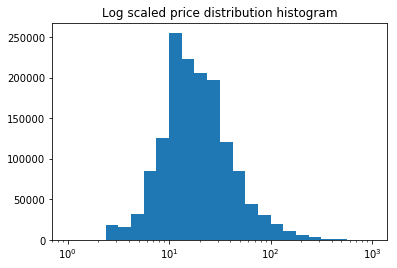

In [10]:
# A logarithmically scaled histogram of the price distribution

plt.hist(train_df.price[train_df.price > 0], bins=10**np.linspace(0, 3, 25))
plt.title('Log scaled price distribution histogram')
plt.xscale('log') 
plt.show() 

((array([-4.90471412, -4.72767087, -4.63203236, ...,  4.63203236,
          4.72767087,  4.90471412]),
  array([1.09861229, 1.09861229, 1.09861229, ..., 7.60290046, 7.60389797,
         7.60539236])),
 (0.78126453350128, 2.9129305217149466, 0.9902626442410368))

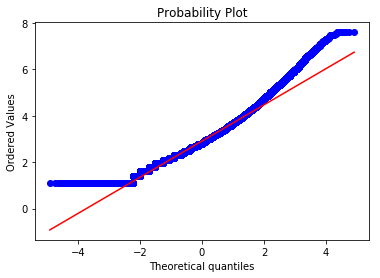

In [11]:
# This probability plot tests whether log-transformed prices are normally distributed.
# They seem to be heavy-tailed on the right, which is a pattern that mirrors pricing in financial markets (leptokurtosis)
# The heavy right tail is also visible in the histogram above
stats.probplot(np.log(train_df.price[train_df.price > 0]), dist = 'norm', plot = plt)

In [12]:
# The number of items with each item condition category
train_df.item_condition_id.value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

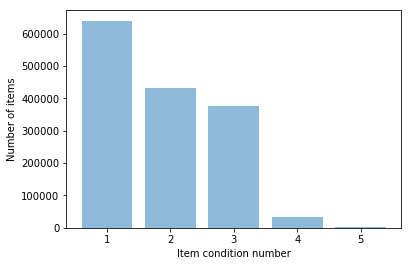

In [13]:
# A bar plot of the number of items with each item condition category, graphical representation of the above cell
# I think pandas has a simplier method for a categorical series object, I'm not sure I needed to set this up myself in matplotlib

y_pos = np.arange(len(train_df.item_condition_id.value_counts()))
plt.bar(y_pos, train_df.item_condition_id.value_counts(), align='center', alpha=0.5)
plt.xticks(y_pos, train_df.item_condition_id.cat.categories.values)
plt.ylabel('Number of items')
plt.xlabel('Item condition number')

In [33]:
# The next goal is to figure out, within each category, and then as a whole, the proportion of the error that can be eliminated by specifying the category.
# Based on intuition from visual inspection of the names of the categories, it seems that specifying the second level category plausibly eliminates much of the error.

# Need to consolidate logs so this function goes faster

'''
def get_group_stats(group_like): #Takes group or Series - but it needs to be made into two functions for each input type, because as it is you have to many if's
    
        log_group_like = group_like.transform(lambda y: np.log(y + 1))
    if isinstance(group_like, pd.core.groupby.SeriesGroupBy):
       # log_group_stats = log_group_st
    
    # Log ones need to be counted groupwise
    mean_raw = group_like.mean()
    mean_log = log_group_like.mean()
    std_log = log_group_like.std()
    sem_log = std_log/log_group_like.count()
    
    group_stats_dict = {'mean' : mean_raw, 'mean log': mean_log, 'std log' : std_log, 'sem log' : sem_log}
    
    if isinstance(group_like, pd.core.groupby.SeriesGroupBy):
        group_stats = pd.DataFrame(group_stats_dict)
    elif isinstance(group_like, pd.core.series.Series):
        group_stats = pd.Series(group_stats_dict)
    else:
        raise Exception('Must be Series or Grouped Series')
    
    return group_stats
''' 

new_df = train_df.drop('category_twoLevel', axis = 1).assign(category_twoLevel = train_df.category_twoLevel.cat.add_categories('NaN').fillna('NaN'))
new_df = new_df.assign(log_price = np.log(new_df.price + 1))

# Log price stats for whole dataset
price_stats = pd.Series({'n' : new_df.price.count(), 'mean' : new_df.price.mean(), 'mean log': new_df.log_price.mean(), 'std log' : new_df.log_price.std(), 'sem log' : new_df.log_price.std()/np.sqrt(new_df.log_price.count())})
#price_stats = get_group_stats(train_df.price)

# Log price stats for each category - must add transform
grouped_df = new_df.groupby('category_twoLevel')
stats_dict = {'n' : grouped_df.price.count(), 'mean' : grouped_df.price.mean(), 'mean log': grouped_df.log_price.mean(), 'std log' : grouped_df.log_price.std(), 'sem log' : grouped_df.log_price.std()/np.sqrt(grouped_df.log_price.count())}
category2_price_stats = pd.DataFrame(stats_dict)
#category2_price_stats = get_group_stats(train_df.drop('category_twoLevel', axis = 1).assign(category_twoLevel = train_df.category_twoLevel.cat.add_categories('NaN').fillna('NaN')).groupby('category_twoLevel').price)

In [34]:
price_stats

mean        2.673752e+01
mean log    2.979059e+00
n           1.482535e+06
sem log     6.153196e-04
std log     7.492094e-01
dtype: float64

In [35]:
category2_price_stats

mean  mean log       n   sem log  \
category_twoLevel                                                              
Beauty/Bath & Body                     19.084687  2.767214    7758  0.007405   
Beauty/Fragrance                       23.801062  2.989748   24294  0.004101   
Beauty/Hair Care                       19.374646  2.815232    7770  0.006784   
Beauty/Makeup                          18.686176  2.767961  124624  0.001735   
Beauty/Other                           22.952965  2.812244     489  0.033802   
Beauty/Skin Care                       20.497721  2.798968   29838  0.003890   
Beauty/Tools & Accessories             19.907468  2.770611   13055  0.005916   
Electronics/Cameras & Photography      71.343813  3.742712    3976  0.015691   
Electronics/Car Audio, Video & GPS     37.874031  3.324236     516  0.034974   
Electronics/Cell Phones & Accessories  30.142278  2.771278   53290  0.004040   
Electronics/Computers & Tablets        87.887754  3.810479    7439  0.012970   
Electronics/Media                      14.599293  2.543050   11602  0.005519   
Electronics/Other                      37.294955  3.221005     773  0.030882   
Electronics/TV, Audio & Surveillance   44.159542  3.385792    9123  0.009582   
Electronics/Video Games & Consoles     32.001501  3.082391   35971  0.004313   
Handmade/Accessories                   19.285978  2.551814    5955  0.010968   
Handmade/Art                           14.748476  2.465291     656  0.027865   
Handmade/Bags and Purses               36.163150  3.285465    3175  0.013370   
Handmade/Books and Zines               14.239130  2.440405      46  0.101980   
Handmade/Candles                       21.734375  2.864230      64  0.087763   
Handmade/Ceramics and Pottery          20.280702  2.813743      57  0.095065   
Handmade/Children                      12.664251  2.387288    1242  0.016942   
Handmade/Clothing                      18.883469  2.821350    5638  0.007053   
Handmade/Crochet                       19.068376  2.730114     234  0.041293   
Handmade/Dolls and Miniatures          27.469388  2.976435      49  0.118885   
Handmade/Furniture                     11.666667  2.533967       3  0.071320   
Handmade/Geekery                       11.990909  2.432179     110  0.047783   
Handmade/Glass                         18.771959  2.820666     592  0.022160   
Handmade/Holidays                      15.901538  2.679054     325  0.029681   
Handmade/Housewares                    17.273782  2.723694     431  0.027659   
...                                          ...       ...     ...       ...   
Vintage & Collectibles/Collectibles    24.341852  2.947271    5811  0.008884   
Vintage & Collectibles/Electronics     27.209234  3.036448    2729  0.013860   
Vintage & Collectibles/Furniture       20.300000  2.795811      10  0.245469   
Vintage & Collectibles/Home Decor      23.536688  2.956892     477  0.030082   
Vintage & Collectibles/Housewares      27.016744  3.143992    1732  0.014352   
Vintage & Collectibles/Jewelry         29.166205  2.977551    2527  0.016646   
Vintage & Collectibles/Other           20.180488  2.726092     410  0.035566   
Vintage & Collectibles/Paper Ephemera  20.648485  2.670101     165  0.063282   
Vintage & Collectibles/Serving         25.797985  3.131764    1886  0.012226   
Vintage & Collectibles/Supplies        20.937050  2.831786    1112  0.020731   
Vintage & Collectibles/Toy             26.132425  2.989906    7340  0.008369   
Vintage & Collectibles/Trading Cards   14.788678  2.316632    6483  0.010377   
Women/Athletic Apparel                 28.844614  3.173485  123457  0.001850   
Women/Coats & Jackets                  34.041360  3.322398   15087  0.005291   
Women/Dresses                          29.445015  3.146718   45758  0.003225   
Women/Jeans                            25.885614  3.120281   32338  0.003158   
Women/Jewelry                          28.058633  2.849758   56837  0.003860   
Women/Maternity                        21.11

In [30]:
new_df[new_df['category_twoLevel'] == 'Beauty/Makeup'].head(20)

name item_condition_id  \
train_id                                                               
10                                 Smashbox primer                 2   
15                     Sephora tarte birthday gift                 1   
16                               Glitter Eyeshadow                 1   
18             Too Faced Limited "Merry Macaroons"                 1   
30          Too Faced Better Than Sex Mascara QTY3                 1   
40                          Kylie Birthday Edition                 1   
43                Apricot beige stick foundation!!                 1   
49                  Younique 3d fiber lash mascara                 1   
81           *Hold*FREE TODAY-IT COSMETICS CC HOLD                 1   
82                                  Mascara Bundle                 2   
83            Eyebrows Essential Kit MEDIUM; Brown                 1   
96             Luminess Air Airbrush Makeup System                 1   
112                             Huda Beauty Lashes                 1   
117                          Eyeko liquid eyeliner                 1   
133                         . BBW Mentha Lip Balms                 1   
135              Nars dual intensity cheek palette                 1   
157                   Opi polish Hold for Chi Thuy                 1   
165       Bare minerals Nude Matte liquid lipcolor                 1   
174                      Realher Eveshadow Pallete                 2   
187             3D moodstruck fiber lashes mascara                 1   

                          category_name         brand_name  price shipping  \
train_id                                                                     
10                   Beauty/Makeup/Face           Smashbox    8.0        1   
15            Beauty/Makeup/Makeup Sets              Tarte   11.0        1   
16                   Beauty/Makeup/Eyes         Wet n Wild    6.0        1   
18        Beauty/Makeup/Makeup Palettes          Too Faced   25.0        1   
30                   Beauty/Makeup/Eyes          Too Faced   32.0        1   
40            Beauty/Makeup/Makeup Sets    Kylie Cosmetics   20.0        1   
43                   Beauty/Makeup/Face                NaN   12.0        1   
49                   Beauty/Makeup/Eyes                NaN    9.0        1   
81                   Beauty/Makeup/Face            Sephora   14.0        1   
82                   Beauty/Makeup/Eyes                NaN    9.0        1   
83                   Beauty/Makeup/Eyes                NaN    6.0        1   
96                   Beauty/Makeup/Face                NaN   81.0        1   
112                  Beauty/Makeup/Eyes            Sephora   12.0        0   
117                  Beauty/Makeup/Eyes                NaN    5.0        1   
133                  Beauty/Makeup/Lips  Bath & Body Works   21.0        1   
135                  Beauty/Makeup/Face               Nars   39.0        0   
157                 Beauty/Makeup/Nails                NaN  150.0        1   
165                  Beauty/Makeup/Lips                NaN   10.0        0   
174       Beauty/Makeup/Makeup Palettes            Sephora   20.0        0   
187                  Beauty/Makeup/Eyes           Younique   14.0        1   

                                           item_description category_oneLevel  \
train_id                                                                        
10             0.25 oz Full size is 1oz for [rm] in Sephora            Beauty   
15        Brand new. Deluxe travel size products. Contai...            Beauty   
16        2 glitter eyeshadows; one in Brass and one in ...            Beauty   
18        This AUTHENTIC pallete by Too Faced is brand n...            Beauty   
30        BNIB 3 for [rm] Better Than Sex Waterproof Mas...            Beauty   
40        Kylie Happy Birthday Matte Mini Lipstick Kylie...            Beauty   
43        Great quality!!! Fast free shipping!! You can ...            Beauty   
49        Youni

In [26]:
# Planning to regress log price on the category names
# This needs to be changed to log price as is done with the rest of this notebook